✅ Dataset loaded successfully!

First 5 rows of the dataset:
   gender     hsc_p     hsc_s  degree_p   degree_t   etest_p specialisation  \
0      M  0.857051  Commerce  0.057143   Sci&Tech  0.104167         Mkt&HR   
1      M  0.586729   Science  0.613714   Sci&Tech  0.760417        Mkt&Fin   
2      M  0.409023      Arts  0.228571  Comm&Mgmt  0.520833        Mkt&Fin   
3      M  0.485812  Commerce  0.494286  Comm&Mgmt  0.975000        Mkt&Fin   
4      M  0.280990   Science  0.285714   Sci&Tech  0.354167        Mkt&Fin   

   mba_p    salary  
0  58.80  0.094595  
1  66.28  0.000000  
2  57.80  0.067568  
3  55.50  0.304054  
4  62.14  0.070270  

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          148 non-null    object 
 1   hsc_p           148 non-null    float64
 2   hsc_s           148 non-null    object

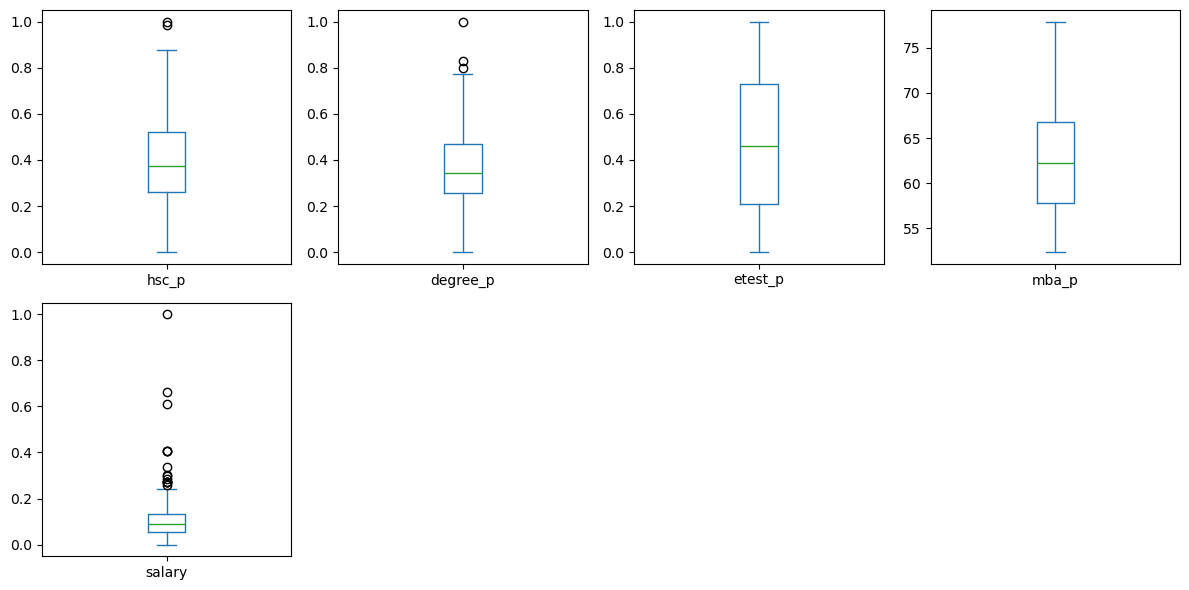


After capping, dataset description:
             hsc_p    degree_p     etest_p       mba_p      salary
count  148.000000  148.000000  148.000000  148.000000  148.000000
mean     0.408964    0.362431    0.482086   62.570072    0.117179
std      0.194834    0.182263    0.284994    5.852203    0.110940
min      0.076381    0.000000    0.014015   52.672900    0.000000
25%      0.259654    0.257143    0.208333   57.772500    0.054054
50%      0.374867    0.342857    0.458333   62.245000    0.087838
75%      0.521016    0.469214    0.729167   66.760000    0.135135
max      0.934926    0.815143    0.983583   76.222400    0.636757

Encoded dataset preview:
    gender     hsc_p  hsc_s  degree_p  degree_t   etest_p  specialisation  \
0       1  0.857051      1  0.057143         2  0.104167               1   
1       1  0.586729      2  0.613714         2  0.760417               0   
2       1  0.409023      0  0.228571         0  0.520833               0   
3       1  0.485812      1  0.494286 

In [1]:
# Step 1: Importing the necessary Python libraries for data preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from scipy import stats

# Step 2: Load the placement dataset into a Pandas DataFrame
df = pd.read_csv("lab2anew.csv")
print("✅ Dataset loaded successfully!")

# Step 3: Take a quick look at the data to understand its structure and identify missing values/anomalies
print("\nFirst 5 rows of the dataset:\n", df.head())
print("\nDataset Info:\n")
df.info()
print("\nMissing Values in each column:\n", df.isnull().sum())

# Step 4 Option 1: Identifying Outliers Using Z-Scores
numeric_df = df.select_dtypes(include=[np.number])

z_scores = np.abs(zscore(numeric_df, nan_policy='omit'))
outliers = (z_scores > 3).any(axis=1)

print(f"\nNumber of outliers detected using Z-score: {outliers.sum()}")
print("Outlier row indices:", df[outliers].index.tolist())

# Visualize outliers using boxplots
numeric_df.plot(kind='box', figsize=(12,6), subplots=True, layout=(2,4), sharey=False)
plt.tight_layout()
plt.show()

# Step 4 Option 2: Capping and Flooring Outliers
df_capped = df.copy()
for col in numeric_df.columns:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df_capped[col] = np.where(df[col] < lower, lower, 
                              np.where(df[col] > upper, upper, df[col]))

print("\nAfter capping, dataset description:\n", df_capped.describe())

# Step 5: Convert categorical variables into numerical format using LabelEncoder
df_encoded = df_capped.copy()
label_encoders = {}

for col in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le

print("\nEncoded dataset preview:\n", df_encoded.head())

# (Optional) Save the cleaned and encoded dataset
df_encoded.to_csv("lab2anew_cleaned.csv", index=False)
print("\n💾 Cleaned and encoded dataset saved as 'lab2anew_cleaned.csv'")
